In [6]:
import sys
import numpy as np
import matplotlib.pyplot as plt

import joblib
import os
import scipy.io as sio
import cmocean as cm
import seaborn as sns  


In [7]:
project = 'kolmogorov'

In [8]:
# Adjust the path to your project root directory where 'models' folder is located
project_root = os.path.abspath('../../../')  # or the relative path to your root from the notebook folder

if project_root not in sys.path:
    sys.path.insert(0, project_root)


from src.utils import *

In [9]:
L1, L2 = 2*np.pi, 2*np.pi
n1, n2 = 64, 64

grid_x = np.linspace(0,L1-L1/n1,n1)
grid_y = np.linspace(0,L2-L2/n2,n2)

grid_x, grid_y = np.meshgrid(grid_x, grid_y)

Kx = np.concatenate([np.arange(0, n1//2), np.arange(-n1//2, 0)]) * (2 * np.pi / L1)
Ky = np.concatenate([np.arange(0, n2//2), np.arange(-n2//2, 0)]) * (2 * np.pi / L2)

kx, ky = np.meshgrid(Kx,Ky)

dt_sim = 0.5
T_sim = 10000
nt = int(T_sim/dt_sim)

In [10]:
u1 = np.load(f'{project_root}/data/{project}/u1.npy') 
u2 = np.load(f'{project_root}/data/{project}/u2.npy')
w = np.load(f'{project_root}/data/{project}/vorticity.npy')
nt, n1, n2 = u1.shape


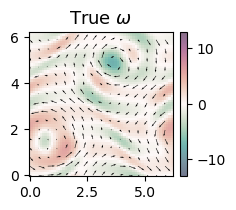

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(2.25, 1.875))

def plot_vorticity(ax, field, title, vmin, vmax, quiver=None, alpha=0.6, cmap=cm.cm.curl):
    mesh = ax.pcolormesh(grid_x, grid_y, field, cmap=cmap, vmin=vmin, vmax=vmax, shading='auto', alpha=alpha)
    ax.set_title(title, fontsize=13)
    ax.set_aspect('equal')
    if quiver is not None:
        ax.quiver(grid_x[::4, ::4], grid_y[::4, ::4], quiver[0][::4, ::4], quiver[1][::4, ::4], color='black')
    return mesh

vmin_w = np.min(w)
vmax_w = np.max(w)

# Plot the first frame and create the colorbar
mesh = plot_vorticity(ax, w[0], 'True $\omega$', vmin_w, vmax_w, quiver=(u1[0], u2[0]))
cbar = plt.colorbar(mesh, ax=ax, fraction=0.046, pad=0.04)

for idx in range(0, nt, 200):
    ax.clear()
    mesh = plot_vorticity(ax, w[idx], 'True $\omega$', vmin_w, vmax_w, quiver=(u1[idx], u2[idx]))
    plt.savefig(f'{project_root}/figures/{project}/movie/frame_{idx:04d}.png', dpi=300, bbox_inches='tight')
